<a href="https://colab.research.google.com/github/LarryDCJ/AC_Classifier/blob/master/Classifier_Conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pwd

/content/drive/My Drive/AC_Classifier


In [77]:
!git status

On branch master
nothing to commit, working tree clean


In [73]:
!git rm --cached `git status | grep deleted | sed 's#^.*:##'`

rm 'images/A-10/A-10_09.jpg'
rm 'images/A-10/A-10_108.jpg'
rm 'images/A-10/A-10_120.jpg'
rm 'images/A-10/A-10_140.jpg'
rm 'images/A-10/A-10_242.jpg'
rm 'images/A-10/A-10_34.jpg'
rm 'images/A-10/A-10_38.jpg'
rm 'images/A-10/A-10_44.jpg'
rm 'images/A-10/A-10_59.jpg'
rm 'images/A-10/A-10_80.jpg'
rm 'images/AWACS/AWACS_192.jpg'
rm 'images/AWACS/AWACS_194.jpg'
rm 'images/AWACS/AWACS_245.jpg'
rm 'images/AWACS/AWACS_498.jpg'
rm 'images/B-2/B-2_203.jpg'
rm 'images/B-52/B-52_78.jpg'
rm 'images/C-17/C-17_120.jpg'
rm 'images/C-17/C-17_203.jpg'
rm 'images/C-17/C-17_235.jpg'
rm 'images/C-5/C-5_133.jpg'
rm 'images/F-15E/F-15E_289.jpg'
rm 'images/F-22/F-22_244.jpg'
rm 'images/F-35/F-35_124.jpg'
rm 'images/F-35/F-35_161.jpg'
rm 'images/F-35/F-35_209.jpg'
rm 'images/F-35/F-35_226.jpg'
rm 'images/F-35/F-35_259.jpg'
rm 'images/F-35/F-35_265.jpg'
rm 'images/F-35/F-35_305.jpg'
rm 'images/F-35/F-35_319.jpg'
rm 'images/F-35/F-35_51.jpg'
rm 'images/F-35/F-35_89.jpg'
rm 'images/FA-18/FA-18_179.jpg'
rm 'images/

In [84]:
!git status

On branch master
nothing to commit, working tree clean


In [29]:
!git stash

Saved working directory and index state WIP on master: c428a18 colab updates


In [ ]:
! git commit -m "getting cleaner!"

In [ ]:
! git pull https://github.com/LarryDCJ/AC_Classifier.git

In [ ]:
! git config --global user.email "larrydcj@icloud.com"
! git config --global user.name "LarryDCJ"

In [85]:
!git config --get remote.origin.url

git@github.com:LarryDCJ/AC_Classifier.git


In [80]:
!ssh-keyscan -t rsa domain.com >> ~/.ssh/known_hosts

In [88]:
! git push origin https://git@github.com:LarryDCJ/AC_Classifier.git

error: src refspec https://git@github.com does not match any.
error: failed to push some refs to 'git@github.com:LarryDCJ/AC_Classifier.git'


In [15]:
!git remote -v

origin	git@github.com:LarryDCJ/AC_Classifier.git (fetch)
origin	git@github.com:LarryDCJ/AC_Classifier.git (push)


In [ ]:
!pip install fastbook

In [ ]:
! pip install utils

In [ ]:
import re
from fastai.data.all import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import pathlib
from IPython.display import Image
from google.colab import drive
import os
from fastai.vision.widgets import *
from utils import *
drive.mount('/content/drive')
config_file = Path("~/.fastai/config.yml").expanduser()

if config_file.exists(): os.remove(config_file)
assert not config_file.exists()
config = Config()
assert config_file.exists()
config['archive_path'] = Path('drive/archive')
config['data_path'] = Path('drive/data')
config['model_path'] = Path('drive/models')
config['storage_path'] = Path('root/tmp')
config.save()

In [ ]:
%cd /content/drive/MyDrive/AC_Classifier

In [66]:
path = Path('/content/drive/MyDrive/AC_Classifier/')
path.ls()
files = get_image_files(path/"images")
def label_func(f): return f[0].isupper()
print(f"{len(files)} files to be loaded.")

4501 files to be loaded.


In [67]:
print(files[0].name)
#def label_func(f): return re.sub("_[^_]+$", "",f) #rename folder based on filename
pat = r'^(.*)_\d+.jpg' #Image Categories from filename

A-10_105.jpg


In [68]:
dls = ImageDataLoaders.from_name_re(path,
                                    files,
                                    pat,
                                    item_tfms=RandomResizedCrop(224, min_scale=0.5),
                                    batch_tfms=aug_transforms())

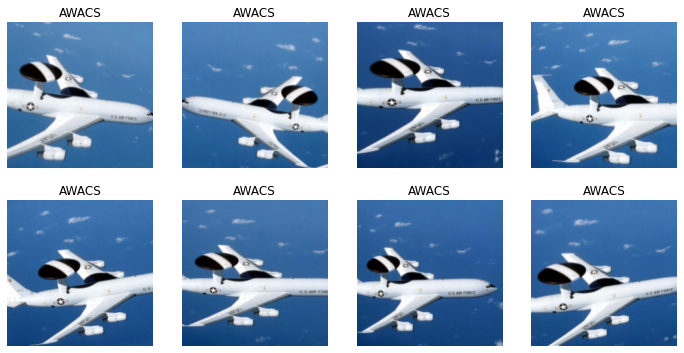

In [69]:
dls.train.show_batch(max_n=8,nrows=2, unique=True)

In [70]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [71]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [65]:
for idx in cleaner.delete():
  try: cleaner.fns[idx].unlink()
  except: pass

path = Path('/content/drive/MyDrive/AC_Classifier/')
path.ls()
files = get_image_files(path/"images")
print(len(files))

dls = ImageDataLoaders.from_name_re(path,
                                    files,
                                    pat,
                                    item_tfms=RandomResizedCrop(224, min_scale=0.5),
                                    batch_tfms=aug_transforms())
learn = cnn_learner(dls, resnet34, metrics=error_rate)

4501


In [ ]:
learn.fine_tune(4)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(2, 3e-5)